# 라이브러리 / 데이터 불러오기

## 라이브러리 불러오기

In [3]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 데이터 불러오기

In [5]:
# 데이터 불러오기
sensor1 = pd.read_csv('data/g1_sensor1.csv', names = ['time','normal','type1','type2','type3'])
sensor2 = pd.read_csv('data/g1_sensor2.csv', names = ['time','normal','type1','type2','type3'])
sensor3 = pd.read_csv('data/g1_sensor3.csv', names = ['time','normal','type1','type2','type3'])
sensor4 = pd.read_csv('data/g1_sensor4.csv', names = ['time','normal','type1','type2','type3'])

# 데이터 확인

In [7]:
# 데이터 확인
sensor1

,time,normal,type1,type2,type3
0,0.000000,-0.853307,-3.464579,0.555219,3.919664
1,0.000736,-0.740463,-2.448986,-0.234687,4.145351
2,0.001472,-0.138630,-1.922383,-0.009000,2.941685
3,0.002208,0.049443,-0.906790,-0.272301,2.603155
4,0.002944,-0.289088,-0.568259,-0.986978,1.361874
...,...,...,...,...,...
190213,139.996768,-1.156354,-2.696750,0.844491,-2.109427
190214,139.997504,-0.930666,-1.380241,0.919720,-2.222270
190215,139.998240,-0.554521,-2.132532,0.731647,-2.109427
190216,139.998976,-1.419655,-2.433448,1.183022,-3.087405


## 데이터 사이즈 확인

In [9]:
# 데이터 사이즈 확인
print('sensor 1의 데이터 크기',{sensor1.shape})
print('sensor 2의 데이터 크기',{sensor2.shape})
print('sensor 3의 데이터 크기',{sensor3.shape})
print('sensor 4의 데이터 크기',{sensor4.shape})

sensor 1의 데이터 크기 {(190218, 5)}
sensor 2의 데이터 크기 {(184211, 5)}
sensor 3의 데이터 크기 {(196079, 5)}
sensor 4의 데이터 크기 {(183969, 5)}


## 데이터 선형보간

In [11]:
# 데이터 선형 보간
from scipy import interpolate

# 새로운 x 좌표를 생성, 0에서 140까지 0.001 간격으로
x_new = np.arange(0,140, 0.001)

# 각 센서의 새로운 y 값을 저장할 빈 리스트 생성
y_new1 = []; y_new2 = []; y_new3=[]; y_new4 = []

print(x_new)
print(y_new1, y_new2, y_new2, y_new4)

# 'normal', 'type1', 'type2', 'type3' 항목에 대해 반복
for item in ['normal', 'type1', 'type2', 'type3']:
    # sensor1 데이터에 대해 1차원 보간 함수 생성 및 새로운 x 값에 대해 보간
    f_linear1 = interpolate.interp1d(sensor1['time'], sensor1[item], kind='linear')
    y_new1.append(f_linear1(x_new))
    
    # sensor2 데이터에 대해 1차원 보간 함수 생성 및 새로운 x 값에 대해 보간
    f_linear2 = interpolate.interp1d(sensor2['time'], sensor2[item], kind='linear')
    y_new2.append(f_linear2(x_new))
    
    # sensor3 데이터에 대해 1차원 보간 함수 생성 및 새로운 x 값에 대해 보간
    f_linear3 = interpolate.interp1d(sensor3['time'], sensor3[item], kind='linear')
    y_new3.append(f_linear3(x_new))
    
    # sensor4 데이터에 대해 1차원 보간 함수 생성 및 새로운 x 값에 대해 보간
    f_linear4 = interpolate.interp1d(sensor4['time'], sensor4[item], kind='linear')
    y_new4.append(f_linear4(x_new))

# 보간된 y 값을 이용하여 새로운 데이터프레임 생성, 각 데이터프레임은 'normal', 'type1', 'type2', 'type3' 열을 가짐
sensor1 = pd.DataFrame(np.array(y_new1).T, columns=['normal', 'type1', 'type2', 'type3'])
sensor2 = pd.DataFrame(np.array(y_new2).T, columns=['normal', 'type1', 'type2', 'type3'])
sensor3 = pd.DataFrame(np.array(y_new3).T, columns=['normal', 'type1', 'type2', 'type3'])
sensor4 = pd.DataFrame(np.array(y_new4).T, columns=['normal', 'type1', 'type2', 'type3'])

[0.00000e+00 1.00000e-03 2.00000e-03 ... 1.39997e+02 1.39998e+02
 1.39999e+02]
[] [] [] []


In [12]:
print('sensor 1의 데이터 크기',{sensor1.shape})
print('sensor 2의 데이터 크기',{sensor2.shape})
print('sensor 3의 데이터 크기',{sensor3.shape})
print('sensor 4의 데이터 크기',{sensor4.shape})

sensor 1의 데이터 크기 {(140000, 4)}
sensor 2의 데이터 크기 {(140000, 4)}
sensor 3의 데이터 크기 {(140000, 4)}
sensor 4의 데이터 크기 {(140000, 4)}


## 1차 가공 데이터셋

In [14]:
# 각 센서의 'normal' 열을 수직 방향으로 결합하여 새로운 데이터프레임 생성
normal_ = pd.concat([sensor1['normal'], sensor2['normal'], sensor3['normal'], sensor4['normal']], axis = 1)
# 각 센서의 'type1' 열을 수직 방향으로 결합하여 새로운 데이터프레임 생성
type1_ = pd.concat([sensor1['type1'], sensor2['type1'], sensor3['type1'], sensor4['type1']], axis = 1)
# 각 센서의 'type2' 열을 수직 방향으로 결합하여 새로운 데이터프레임 생성
type2_ = pd.concat([sensor1['type2'], sensor2['type2'], sensor3['type2'], sensor4['type2']], axis = 1)
# 각 센서의 'type3' 열을 수직 방향으로 결합하여 새로운 데이터프레임 생성
type3_ = pd.concat([sensor1['type3'], sensor2['type3'], sensor3['type3'], sensor4['type3']], axis = 1)

# 결합된 데이터프레임의 열 이름을 각각 's1', 's2', 's3', 's4'로 설정
# 이는 각 열이 각기 다른 센서에서 온 데이터를 의미함
normal_.columns =  ['s1','s2','s3','s4']; type1_.columns = ['s1','s2','s3','s4']
type2_.columns =  ['s1','s2','s3','s4']; type3_.columns = ['s1','s2','s3','s4']

In [15]:
normal_

,s1,s2,s3,s4
0,-0.853307,0.048823,-0.437626,-1.116226
1,-0.524588,-0.029477,-0.149817,-0.659694
2,-0.003708,-0.004751,0.280889,-0.857345
3,-0.297674,0.009673,-0.303281,-0.685318
4,-0.091203,0.096215,-0.320263,-0.303108
...,...,...,...,...
139995,-1.057411,0.587429,0.275044,0.289837
139996,-0.513635,-0.137874,-0.045973,0.131462
139997,-1.085213,0.002242,-0.164593,-0.087380
139998,-0.677177,-0.308897,0.288252,1.319862


## 데이터 시각화

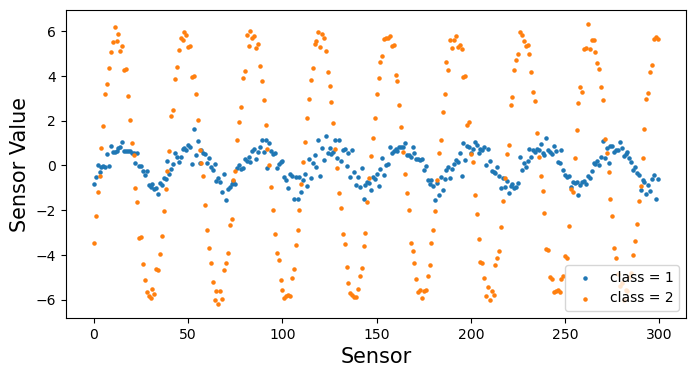

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [17]:
# 데이터 시각화
# 그래프 크기 설정 (가로 8, 세로 4)
plt.figure(figsize=(8, 4))

# 'normal_' 데이터프레임의 's1' 열에서 처음 300개의 값을 산점도로 플로팅, 클래스 라벨 추가, 마커 모양과 크기 설정
plt.scatter(range(0, 300), normal_['s1'][:300], label="class = " + str(1), marker='o', s=5)

# 'type1_' 데이터프레임의 's1' 열에서 처음 300개의 값을 산점도로 플로팅, 클래스 라벨 추가, 마커 모양과 크기 설정
plt.scatter(range(0, 300), type1_['s1'][:300], label="class = " + str(2), marker='o', s=5)

# 범례 위치 설정 (오른쪽 아래)
plt.legend(loc="lower right")

# x축 레이블 설정, 폰트 크기 설정
plt.xlabel("Sensor", fontsize=15)

# y축 레이블 설정, 폰트 크기 설정
plt.ylabel("Sensor Value", fontsize=15)

# 그래프 보여주기
plt.show()

# 플롯 닫기
plt.close

In [18]:
normal_.corr()

,s1,s2,s3,s4
s1,1.000000,-0.007093,0.004297,-0.003377
s2,-0.007093,1.000000,-0.002992,0.111121
s3,0.004297,-0.002992,1.000000,-0.006434
s4,-0.003377,0.111121,-0.006434,1.000000


<Axes: >

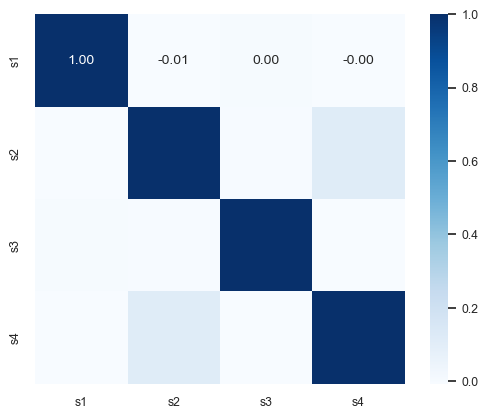

In [19]:
# 실행되지 않는 경우, 아래 코드는 주석처리하고 넘어가도 괜찮습니다. (데이터 확인용)
names = ['s1','s2','s3','s4']
cm = np.corrcoef(normal_[names].values.T)
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels = names, xticklabels=names, cmap=plt.cm.Blues)

In [20]:
normal_.describe()

,s1,s2,s3,s4
count,140000.000000,140000.000000,140000.000000,140000.000000
mean,0.000154,-0.000176,-0.000055,-0.000033
std,0.662102,0.919906,0.289013,0.596637
min,-1.977848,-3.269776,-1.855522,-2.379047
25%,-0.603861,-0.708364,-0.173364,-0.433211
50%,0.108722,0.061636,0.017206,-0.022380
75%,0.578152,0.713594,0.191632,0.412691
max,1.791827,3.218889,1.265530,2.172116


## 데이터 전처리

In [22]:
normal_

,s1,s2,s3,s4
0,-0.853307,0.048823,-0.437626,-1.116226
1,-0.524588,-0.029477,-0.149817,-0.659694
2,-0.003708,-0.004751,0.280889,-0.857345
3,-0.297674,0.009673,-0.303281,-0.685318
4,-0.091203,0.096215,-0.320263,-0.303108
...,...,...,...,...
139995,-1.057411,0.587429,0.275044,0.289837
139996,-0.513635,-0.137874,-0.045973,0.131462
139997,-1.085213,0.002242,-0.164593,-0.087380
139998,-0.677177,-0.308897,0.288252,1.319862


In [23]:
# 데이터 필터링 - 이동평균

# 이동 평균을 계산할 윈도우 크기 설정
M = 15

# normal_ 데이터의 'sx' 열에 대해 이동 평균 계산' 열에 대해 이동 평균 계산
normal_s1 = np.convolve(normal_['s1'], np.ones(M), 'valid') / M
normal_s1 = normal_s1.reshape(len(normal_s1),1)
normal_s2 = np.convolve(normal_['s2'], np.ones(M), 'valid') / M
normal_s2 =normal_s2.reshape(len(normal_s2),1)
normal_s3 = np.convolve(normal_['s3'], np.ones(M), 'valid') / M
normal_s3 =normal_s3.reshape(len(normal_s3),1)
normal_s4 = np.convolve(normal_['s4'], np.ones(M), 'valid') / M
normal_s4 =normal_s4.reshape(len(normal_s4),1)

# type1_ 데이터의 'sx' 열에 대해 이동 평균 계산
type1_s1 = np.convolve(type1_['s1'], np.ones(M), 'valid') / M
type1_s1 =type1_s1.reshape(len(type1_s1),1)
type1_s2 = np.convolve(type1_['s2'], np.ones(M), 'valid') / M
type1_s2 =type1_s2.reshape(len(type1_s2),1)
type1_s3 = np.convolve(type1_['s3'], np.ones(M), 'valid') / M
type1_s3 =type1_s3.reshape(len(type1_s3),1)
type1_s4 = np.convolve(type1_['s4'], np.ones(M), 'valid') / M
type1_s4 =type1_s4.reshape(len(type1_s4),1)

# type2_ 데이터의 'sx' 열에 대해 이동 평균 계산
type2_s1 = np.convolve(type2_['s1'], np.ones(M), 'valid') / M
type2_s1 =type2_s1.reshape(len(type2_s1),1)
type2_s2 = np.convolve(type2_['s2'], np.ones(M), 'valid') / M
type2_s2 =type2_s2.reshape(len(type2_s2),1)
type2_s3 = np.convolve(type2_['s3'], np.ones(M), 'valid') / M
type2_s3 =type2_s3.reshape(len(type2_s3),1)
type2_s4 = np.convolve(type2_['s4'], np.ones(M), 'valid') / M
type2_s4 =type2_s4.reshape(len(type2_s4),1)

# type3_ 데이터의 'sx' 열에 대해 이동 평균 계산
type3_s1 = np.convolve(type3_['s1'], np.ones(M), 'valid') / M
type3_s1 =type3_s1.reshape(len(type3_s1),1)
type3_s2 = np.convolve(type3_['s2'], np.ones(M), 'valid') / M
type3_s2 =type3_s2.reshape(len(type3_s2),1)
type3_s3 = np.convolve(type3_['s3'], np.ones(M), 'valid') / M
type3_s3 =type3_s3.reshape(len(type3_s3),1)
type3_s4 = np.convolve(type3_['s4'], np.ones(M), 'valid') / M
type3_s4 =type3_s4.reshape(len(type3_s4),1)

# normal_ 데이터의 모든 센서 열을 하나의 배열로 결합
normal_temp = np.concatenate((normal_s1,normal_s2,normal_s3,normal_s4), axis =1)

# typex_ 데이터의 모든 센서 열을 하나의 배열로 결합
type1_temp = np.concatenate((type1_s1,type1_s2,type1_s3,type1_s4), axis =1)
type2_temp = np.concatenate((type2_s1,type2_s2,type2_s3,type2_s4), axis =1)
type3_temp = np.concatenate((type3_s1,type3_s2,type3_s3,type3_s4), axis =1)

In [24]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성 (기본 범위는 0에서 1)
scaler = MinMaxScaler()

# normal_ 데이터프레임에 대해 스케일러를 학습시킴
scaler.fit(normal_)

# normal_temp 데이터를 정규화
normal = scaler.transform(normal_temp)

# type1_temp 데이터를 정규화
type1 = scaler.transform(type1_temp)

# type2_temp 데이터를 정규화
type2 = scaler.transform(type2_temp)

# type3_temp 데이터를 정규화
type3 = scaler.transform(type3_temp)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## 데이터 분배(학습 / 검증 / 테스트)

In [26]:
# 전처리 한 데이터 확인
print(normal)
print('-----------------------------------------------')
print('normal data size = ', normal.shape)

[[0.57598822 0.50553898 0.56439491 0.44551164]
 [0.60960317 0.50513674 0.58169332 0.44848001]
 [0.62990663 0.5047345  0.59547186 0.46260474]
 ...
 [0.51874981 0.50106998 0.60999194 0.50715712]
 [0.49713039 0.51588928 0.6074125  0.53093987]
 [0.45708747 0.52025039 0.60349765 0.53976513]]
-----------------------------------------------
normal data size =  (139986, 4)


In [27]:
normal = normal[30000:130000][:]
type1 = type1[30000:130000][:]
type2 = type2[30000:130000][:]
type3 = type3[30000:130000][:]
print(normal)
print('-------------------------------------------------')
print('normal data size=',normal.shape)

[[0.42588581 0.56360116 0.59076635 0.45259554]
 [0.39980512 0.54859132 0.57699856 0.4486034 ]
 [0.38031149 0.54190146 0.57998374 0.44726771]
 ...
 [0.48028648 0.53048363 0.62114742 0.51024851]
 [0.44818273 0.53444251 0.62103995 0.49126006]
 [0.42832757 0.5501298  0.60917718 0.47827626]]
-------------------------------------------------
normal data size= (100000, 4)


In [28]:
# 데이터 분배
# normal 데이터셋 분할
normal_train = normal[:60000]       # 처음 60000개의 데이터를 학습용 데이터로 사용
normal_valid = normal[60000:80000]  # 60000번부터 80000번까지의 데이터를 검증용 데이터로 사용
normal_test = normal[80000:]        # 80000번 이후의 데이터를 테스트용 데이터로 사용

# type1 데이터셋 분할
type1_train = type1[:60000]         # 처음 60000개의 데이터를 학습용 데이터로 사용
type1_valid = type1[60000:80000]    # 60000번부터 80000번까지의 데이터를 검증용 데이터로 사용
type1_test = type1[80000:]          # 80000번 이후의 데이터를 테스트용 데이터로 사용

# type2 데이터셋 분할
type2_train = type2[:60000]         # 처음 60000개의 데이터를 학습용 데이터로 사용
type2_valid = type2[60000:80000]    # 60000번부터 80000번까지의 데이터를 검증용 데이터로 사용
type2_test = type2[80000:]          # 80000번 이후의 데이터를 테스트용 데이터로 사용

# type3 데이터셋 분할
type3_train = type3[:60000]         # 처음 60000개의 데이터를 학습용 데이터로 사용
type3_valid = type3[60000:80000]    # 60000번부터 80000번까지의 데이터를 검증용 데이터로 사용
type3_test = type3[80000:]          # 80000번 이후의 데이터를 테스트용 데이터로 사용

# 학습용 데이터를 하나의 배열로 결합
train = np.concatenate((normal_train, type1_train, type2_train, type3_train))

# 검증용 데이터를 하나의 배열로 결합
valid = np.concatenate((normal_valid, type1_valid, type2_valid, type3_valid))

# 테스트용 데이터를 하나의 배열로 결합
test = np.concatenate((normal_test, type1_test, type2_test, type3_test))

# 각 데이터셋의 형태 출력
print("train data의 형태:", train.shape)
print("valid data의 형태:", valid.shape)
print("test data의 형태:", test.shape)

train data의 형태: (240000, 4)
valid data의 형태: (80000, 4)
test data의 형태: (80000, 4)


### 데이터 분포 시각화

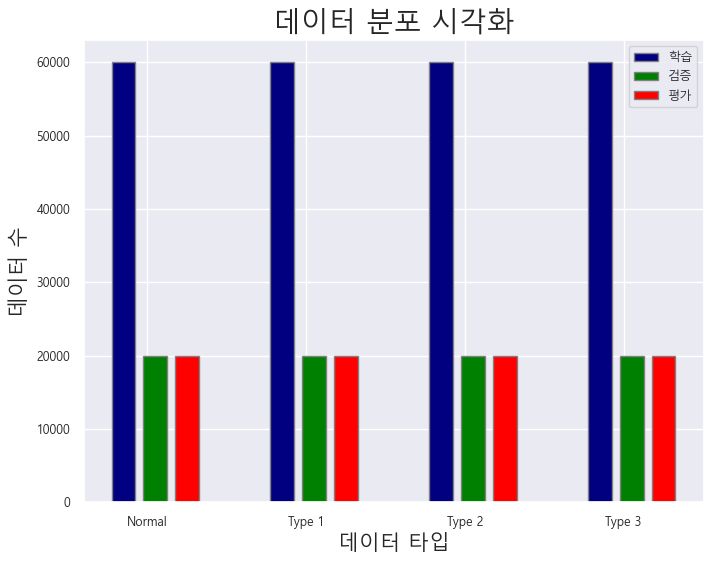

In [30]:
import koreanize_matplotlib

import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows용 경로 예시
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 예제 데이터 생성
categories = ['Normal', 'Type 1', 'Type 2', 'Type 3']
train_counts = [normal_train.shape[0], type1_train.shape[0], type2_train.shape[0], type3_train.shape[0]]   
valid_counts = [normal_valid.shape[0], type1_valid.shape[0], type2_valid.shape[0], type3_valid.shape[0]] 
test_counts = [normal_test.shape[0], type1_test.shape[0], type2_test.shape[0], type3_test.shape[0]] 

# 막대의 폭 설정
bar_width = 0.15
gap = 0.05

# x축 위치 설정
r1 = np.arange(len(categories))
r2 = [x + bar_width + gap for x in r1]
r3 = [x + bar_width + gap for x in r2]
r4 = [x + bar_width  + gap for x in r3]

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 막대차트 생성
plt.bar(r1, train_counts, color='navy', width=bar_width, edgecolor='grey', label='학습')
plt.bar(r2, valid_counts, color='green', width=bar_width, edgecolor='grey', label='검증')
plt.bar(r3, test_counts, color='red', width=bar_width, edgecolor='grey', label='평가')


# x축, y축 레이블 설정
plt.xlabel('데이터 타입', fontsize=15)
plt.ylabel('데이터 수', fontsize=15)
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# 그래프 제목 설정
plt.title('데이터 분포 시각화', fontsize=20)

# 범례 설정
plt.legend()

# 그래프 표시
plt.show()

In [31]:
# 데이터 라벨링

# 각 클래스(0, 1, 2, 3)에 대해 n개의 레이블을 생성하고 이를 하나의 배열로 결합
train_label = np.concatenate((np.full((60000,1),0), np.full((60000,1),1), np.full((60000,1),2), np.full((60000,1),3)))
valid_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1), np.full((20000,1),2), np.full((20000,1),3)))
test_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1), np.full((20000,1),2), np.full((20000,1),3)))

In [32]:
# 학습 데이터 셔플링

idx = np.arange(train.shape[0])  # 학습 데이터의 인덱스를 생성 (0부터 train 데이터의 길이 - 1까지)
np.random.shuffle(idx)  # 인덱스를 무작위로 섞음
train = train[idx]  # 섞인 인덱스를 사용하여 학습 데이터를 셔플링
train_label = train_label[idx]  # 섞인 인덱스를 사용하여 학습 데이터 레이블을 셔플링

# 검증 데이터 셔플링
idx_v = np.arange(valid.shape[0])  # 검증 데이터의 인덱스를 생성 (0부터 valid 데이터의 길이 - 1까지)
np.random.shuffle(idx_v)  # 인덱스를 무작위로 섞음
valid = valid[idx_v]  # 섞인 인덱스를 사용하여 검증 데이터를 셔플링
valid_label = valid_label[idx_v]  # 섞인 인덱스를 사용하여 검증 데이터 레이블을 셔플링

# 테스트 데이터 셔플링
idx_t = np.arange(test.shape[0])  # 테스트 데이터의 인덱스를 생성 (0부터 test 데이터의 길이 - 1까지)
np.random.shuffle(idx_t)  # 인덱스를 무작위로 섞음
test = test[idx_t]  # 섞인 인덱스를 사용하여 테스트 데이터를 셔플링
test_label = test_label[idx_t]  # 섞인 인덱스를 사용하여 테스트 데이터 레이블을 셔플링

In [33]:
# 데이터 형태 변환

# 학습 데이터 변환
x_train = torch.from_numpy(train).float()  # numpy 배열 'train'을 PyTorch tensor로 변환하고 float 형으로 캐스팅
y_train = torch.from_numpy(train_label).float().T[0]  # numpy 배열 'train_label'을 PyTorch tensor로 변환하고 float 형으로 캐스팅, 1차원 배열로 변환

# 검증 데이터 변환
x_valid = torch.from_numpy(valid).float()  # numpy 배열 'valid'를 PyTorch tensor로 변환하고 float 형으로 캐스팅
y_valid = torch.from_numpy(valid_label).float().T[0]  # numpy 배열 'valid_label'을 PyTorch tensor로 변환하고 float 형으로 캐스팅, 1차원 배열로 변환

# 테스트 데이터 변환
x_test = torch.from_numpy(test).float()  # numpy 배열 'test'를 PyTorch tensor로 변환하고 float 형으로 캐스팅
y_test = torch.from_numpy(test_label).float().T[0]  # numpy 배열 'test_label'을 PyTorch tensor로 변환하고 float 형으로 캐스팅, 1차원 배열로 변환

print('변경 전')
train

변경 전


array([[0.12451078, 0.5922215 , 0.55837686, 0.53540935],
       [0.66383083, 0.52207656, 0.6227743 , 0.52871733],
       [0.54367147, 0.47175692, 0.57538144, 0.469606  ],
       ...,
       [0.42575444, 0.5382124 , 0.60454608, 0.49648196],
       [0.33447298, 0.52310969, 0.58151114, 0.47630871],
       [0.57493847, 0.45205493, 0.58252027, 0.43679933]])

In [34]:
print('변경 후')
x_train

변경 후


tensor([[0.1245, 0.5922, 0.5584, 0.5354],
        [0.6638, 0.5221, 0.6228, 0.5287],
        [0.5437, 0.4718, 0.5754, 0.4696],
        ...,
        [0.4258, 0.5382, 0.6045, 0.4965],
        [0.3345, 0.5231, 0.5815, 0.4763],
        [0.5749, 0.4521, 0.5825, 0.4368]])

In [35]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 학습 데이터셋 및 데이터로더 생성
train = TensorDataset(x_train, y_train)  # x_train과 y_train 텐서를 묶어서 TensorDataset 객체 생성
train_dataloader = DataLoader(train, batch_size=5000, shuffle=True)  # TensorDataset을 DataLoader로 변환, 배치 크기는 5000, 데이터 셔플링 활성화

# 검증 데이터셋 및 데이터로더 생성
valid = TensorDataset(x_valid, y_valid)  # x_valid와 y_valid 텐서를 묶어서 TensorDataset 객체 생성
valid_dataloader = DataLoader(valid, batch_size = len(x_valid), shuffle=False)  # TensorDataset을 DataLoader로 변환, 배치 크기는 설정 안함, 데이터 셔플링 활성화

# 테스트 데이터셋 및 데이터로더 생성
test = TensorDataset(x_test, y_test)  # x_test와 y_test 텐서를 묶어서 TensorDataset 객체 생성
test_dataloader = DataLoader(test, batch_size = len(x_valid), shuffle=False)  # TensorDataset을 DataLoader로 변환, 배치 크기는 설정 안함, 데이터 셔플링 활성화

## AI 모델 구축

### 심층신경망(DNN)

In [38]:
# 심층 신경망 모델을 정의하는 클래스
class KAMP_DNN(nn.Module):
    def __init__(self):
        super(KAMP_DNN, self).__init__()  # 부모 클래스(nn.Module)의 초기화를 호출
        
        # 첫 번째 완전 연결 층: 입력 노드 수 4, 출력 노드 수 100
        self.layer1 = nn.Linear(in_features=4, out_features=100)
        # 두 번째 완전 연결 층: 입력 노드 수 100, 출력 노드 수 100
        self.layer2 = nn.Linear(in_features=100, out_features=100)
        # 세 번째 완전 연결 층: 입력 노드 수 100, 출력 노드 수 100
        self.layer3 = nn.Linear(in_features=100, out_features=100)
        # 네 번째 완전 연결 층: 입력 노드 수 100, 출력 노드 수 4
        self.layer4 = nn.Linear(in_features=100, out_features=4)

        # 드롭아웃 레이어: 드롭아웃 비율 0.2
        self.dropout = nn.Dropout(0.2)
        # ReLU 활성화 함수
        self.relu = nn.ReLU()

    # 순전파(Forward) 함수 정의: 모델이 입력 데이터를 처리하는 방법을 정의
    def forward(self, input):
        # 첫 번째 층에 입력을 통과시킴
        out = self.layer1(input)
        out = self.relu(out)  # ReLU 활성화 함수 적용
        out = self.dropout(out)  # 드롭아웃 적용

        # 두 번째 층에 입력을 통과시킴
        out = self.layer2(out)
        out = self.relu(out)  # ReLU 활성화 함수 적용
        out = self.dropout(out)  # 드롭아웃 적용

        out = self.layer2(out)

        # 세 번째 층에 입력을 통과시킴
        out = self.layer3(out)
        out = self.relu(out)  # ReLU 활성화 함수 적용
        out = self.dropout(out)  # 드롭아웃 적용

        # 네 번째 층에 입력을 통과시킴 (출력층)
        out = self.layer4(out)
        return out  # 최종 출력 반환

# 모델 인스턴스를 생성하고 출력
model_check = KAMP_DNN()
print(model_check)

KAMP_DNN(
  (layer1): Linear(in_features=4, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)


### 합성곱신경망(CNN)

In [40]:
# 1D 컨볼루션 신경망 모델을 정의하는 클래스
class KAMP_CNN(nn.Module):
    def __init__(self):
        super(KAMP_CNN, self).__init__()  # 부모 클래스(nn.Module)의 초기화를 호출
        
        # 첫 번째 컨볼루션 블록 정의
        self.conv1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=100, kernel_size=2, stride=1, padding='same'),  # 1D 컨볼루션 레이어
            nn.BatchNorm1d(100),  # 배치 정규화 레이어
            nn.ReLU(),  # ReLU 활성화 함수
            nn.MaxPool1d(kernel_size=1, stride=1),  # 맥스 풀링 레이어
            nn.Dropout(p=0.2)  # 드롭아웃 레이어 (드롭아웃 비율 20%)
        )

        # 네 번째 컨볼루션 블록 정의
        self.conv4 = nn.Sequential(
            nn.Conv1d(in_channels=100, out_channels=4, kernel_size=2, stride=1, padding='same'),  # 1D 컨볼루션 레이어
            nn.BatchNorm1d(4),  # 배치 정규화 레이어
            nn.ReLU(),  # ReLU 활성화 함수
            nn.MaxPool1d(kernel_size=1, stride=1)  # 맥스 풀링 레이어
        )

        # 최종 평균 풀링 레이어
        self.final_pool = nn.AdaptiveAvgPool1d(1)
        # 완전 연결 층 (선형 레이어)
        self.linear = nn.Linear(4, 4)

    # 순전파(Forward) 함수 정의: 모델이 입력 데이터를 처리하는 방법을 정의
    def forward(self, input):
        input = input.unsqueeze(1)  # 입력 데이터를 1차원 확장 (채널 추가)
        out = self.conv1(input)  # 첫 번째 컨볼루션 블록을 통과
        out = self.conv4(out)  # 네 번째 컨볼루션 블록을 통과
        out = self.final_pool(out)  # 최종 평균 풀링 레이어를 통과
        out = self.linear(out.squeeze(-1))  # 선형 레이어를 통과 (차원 축소)
        return out  # 최종 출력 반환

# 모델 인스턴스를 생성하고 출력
model_check = KAMP_CNN()
print(model_check)

KAMP_CNN(
  (conv1): Sequential(
    (0): Conv1d(1, 100, kernel_size=(2,), stride=(1,), padding=same)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
  )
  (conv4): Sequential(
    (0): Conv1d(100, 4, kernel_size=(2,), stride=(1,), padding=same)
    (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (final_pool): AdaptiveAvgPool1d(output_size=1)
  (linear): Linear(in_features=4, out_features=4, bias=True)
)


### 순환신경망(RNN)

In [42]:
import torch
import torch.nn as nn

# RNN 모델을 정의하는 클래스
class KAMP_RNN(nn.Module):
    def __init__(self):
        super(KAMP_RNN, self).__init__()  # 부모 클래스(nn.Module)의 초기화를 호출
        
        # LSTM 레이어 정의
        self.lstm = nn.LSTM(
            input_size=4,       # 입력 크기
            hidden_size=100,    # 은닉층의 크기
            num_layers=2,       # LSTM 층의 수
            batch_first=True,   # 첫 번째 차원이 배치 크기임을 나타냄
            dropout=0.2         # 드롭아웃 비율
        )
        
        # 완전 연결 층 정의
        self.fc = nn.Linear(in_features=100, out_features=4)  # 입력 특징 수와 출력 특징 수

    # 순전파(Forward) 함수 정의: 모델이 입력 데이터를 처리하는 방법을 정의
    def forward(self, input):
        input = input.unsqueeze(1)  # 입력 데이터를 1차원 확장 (채널 추가)
        out, _ = self.lstm(input)  # LSTM 레이어를 통과
        out = out.view(-1, 100)  # 출력 텐서를 2차원으로 변환 (batch_size, hidden_size)
        output = self.fc(out)  # 완전 연결 층을 통과
        return output  # 최종 출력 반환

# 모델 인스턴스를 생성하고 출력
model_check = KAMP_RNN()
print(model_check)

KAMP_RNN(
  (lstm): LSTM(4, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=4, bias=True)
)


## AI 모델 학습

### 모델 학습 코드(공통)

In [45]:
def train_model(model, criterion, optimizer, num_epochs, train_dataloader, PATH):
    loss_values = []  # 학습 손실 값을 저장할 리스트
    loss_values_v = []  # 검증 손실 값을 저장할 리스트
    check = 0  # 조기 종료 체크
    accuracy_past = 0  # 이전 에폭의 정확도
    
    for epoch in range(1, num_epochs + 1):  # 에폭 수만큼 반복
        # -------------------- 모델 학습 -------------------------#
        model.train()  # 모델을 학습 모드로 설정
        batch_number = 0  # 배치 수 초기화
        running_loss = 0.0  # 누적 손실 초기화
        
        for batch_idx, samples in enumerate(train_dataloader):
            x_train, y_train = samples  # 입력 데이터와 레이블 분리
            optimizer.zero_grad()  # 이전 배치의 기울기 초기화
            y_hat = model.forward(x_train)  # 모델을 통해 예측 값 계산
            loss = criterion(y_hat, y_train.long())  # 손실 계산
            loss.backward()  # 역전파를 통해 기울기 계산
            optimizer.step()  # 가중치 업데이트
            running_loss += loss.item()  # 손실 누적
            batch_number += 1  # 배치 수 증가
            
        loss_values.append(running_loss / batch_number)  # 평균 손실 값 저장
        
        # -------------------- 모델 검증 --------------------------#
        model.eval()  # 모델을 평가 모드로 설정
        accuracy = 0.0  # 정확도 초기화
        total = 0.0  # 총 데이터 수 초기화
        
        with torch.no_grad():  # 검증 단계에서는 기울기를 계산하지 않음
            for batch_idx, data in enumerate(valid_dataloader):
                x_valid, y_valid = data  # 검증 데이터와 레이블 분리
                v_hat = model.forward(x_valid)  # 모델을 통해 예측 값 계산
                v_loss = criterion(v_hat, y_valid.long())  # 검증 손실 계산
                _, predicted = torch.max(v_hat.data, 1)  # 가장 높은 값의 인덱스를 예측 값으로 선택
                total += y_valid.size(0)  # 총 데이터 수 계산
                accuracy += (predicted == y_valid).sum().item()  # 정확도 계산
                
        loss_values_v.append(v_loss.item())  # 검증 손실 값 저장
        accuracy = (accuracy / total)  # 정확도 계산
        
        # --------------------- Check for early stopping -------------------#
        if epoch % 1 == 0:  # 에폭마다 출력
            print('[Epoch {} / {}] [Train_Loss : {:.6f} / Valid_Loss `: {:.6f}]'.format(epoch, num_epochs, running_loss / batch_number, v_loss.item()))
            print('[Epoch {} / {}] [Accuracy : {:.6f}]'.format(epoch, num_epochs, accuracy))
            
        if accuracy_past > accuracy:
            check += 1  # 정확도가 떨어지면 체크 증가
        else:
            check = 0  # 체크 초기화
            accuracy_past = accuracy  # 이전 정확도 갱신
            
        if check > 50:  # 50 에폭 동안 정확도가 향상되지 않으면 조기 종료
            print('This is time to do early stopping')
            break
            
    torch.save(model, PATH + 'model.pt')  # 모델 저장
    return loss_values, loss_values_v  # 손실 값 반환

# 예시로 model, criterion, optimizer, num_epochs, train_dataloader, valid_dataloader, PATH를 정의하여 사용
# model_check = KAMP_RNN()
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model_check.parameters())
# num_epochs = 100
# train_dataloader = ...  # 학습 데이터로더
# valid_dataloader = ...  # 검증 데이터로더
# PATH = './'

# loss_values, loss_values_v = train_model(model_check, criterion, optimizer, num_epochs, train_dataloader, valid_dataloader, PATH)

### 심층신경망(DNN) 모델 학습

In [47]:
# DNN 모델을 KAMP_DNN 클래스로 정의
DNN_model = KAMP_DNN()

# 학습할 에폭 수를 1000으로 설정
num_epochs = 1000

# 손실 함수로 교차 엔트로피 손실을 사용
criterion = nn.CrossEntropyLoss()

# 최적화 알고리즘으로 Adam을 사용, 모델의 파라미터를 전달
optimizer = torch.optim.Adam(DNN_model.parameters())

# 모델 저장 경로를 설정
PATH = 'save/DNN/'

# train_model 함수를 호출하여 모델을 학습
DNN_loss_values, DNN_loss_values_v = train_model(DNN_model, criterion, optimizer, num_epochs, train_dataloader,PATH)

[Epoch 1 / 1000] [Train_Loss : 1.323664 / Valid_Loss : 1.085780]
[Epoch 1 / 1000] [Accuracy : 0.431075]
[Epoch 2 / 1000] [Train_Loss : 1.006155 / Valid_Loss : 0.880017]
[Epoch 2 / 1000] [Accuracy : 0.490337]
[Epoch 3 / 1000] [Train_Loss : 0.893893 / Valid_Loss : 0.859758]
[Epoch 3 / 1000] [Accuracy : 0.497475]
[Epoch 4 / 1000] [Train_Loss : 0.870333 / Valid_Loss : 0.844764]
[Epoch 4 / 1000] [Accuracy : 0.514737]
[Epoch 5 / 1000] [Train_Loss : 0.860316 / Valid_Loss : 0.839778]
[Epoch 5 / 1000] [Accuracy : 0.531150]
[Epoch 6 / 1000] [Train_Loss : 0.850780 / Valid_Loss : 0.827321]
[Epoch 6 / 1000] [Accuracy : 0.532700]
[Epoch 7 / 1000] [Train_Loss : 0.840919 / Valid_Loss : 0.819240]
[Epoch 7 / 1000] [Accuracy : 0.537250]
[Epoch 8 / 1000] [Train_Loss : 0.828536 / Valid_Loss : 0.812039]
[Epoch 8 / 1000] [Accuracy : 0.560737]
[Epoch 9 / 1000] [Train_Loss : 0.812246 / Valid_Loss : 0.782937]
[Epoch 9 / 1000] [Accuracy : 0.566662]
[Epoch 10 / 1000] [Train_Loss : 0.792212 / Valid_Loss : 0.758283

### 합성곱신경망(CNN) 모델 학습

In [49]:
# CNN 모델을 KAMP_DNN 클래스로 정의
CNN_model = KAMP_CNN()
# 학습할 에폭 수를 1000으로 설정
num_epochs = 1000
# 손실 함수로 교차 엔트로피 손실을 사용
criterion = nn.CrossEntropyLoss()
# 최적화 알고리즘으로 Adam을 사용, 모델의 파라미터를 전달
optimizer = torch.optim.Adam(CNN_model.parameters())
# 모델 저장 경로를 설정
PATH = 'save/CNN/'
# train_model 함수를 호출하여 모델을 학습
CNN_loss_values, CNN_loss_values_v = train_model(CNN_model, criterion, optimizer, num_epochs, train_dataloader, PATH)

C:\ProgramData\anaconda3\Lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ..\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv1d(input, weight, bias, self.stride,


[Epoch 1 / 1000] [Train_Loss : 1.361380 / Valid_Loss : 1.347766]
[Epoch 1 / 1000] [Accuracy : 0.250113]
[Epoch 2 / 1000] [Train_Loss : 1.269930 / Valid_Loss : 1.226007]
[Epoch 2 / 1000] [Accuracy : 0.343913]
[Epoch 3 / 1000] [Train_Loss : 1.204689 / Valid_Loss : 1.162590]
[Epoch 3 / 1000] [Accuracy : 0.478950]
[Epoch 4 / 1000] [Train_Loss : 1.143120 / Valid_Loss : 1.105597]
[Epoch 4 / 1000] [Accuracy : 0.557013]
[Epoch 5 / 1000] [Train_Loss : 1.088267 / Valid_Loss : 1.054102]
[Epoch 5 / 1000] [Accuracy : 0.555713]
[Epoch 6 / 1000] [Train_Loss : 1.041951 / Valid_Loss : 1.010507]
[Epoch 6 / 1000] [Accuracy : 0.566600]
[Epoch 7 / 1000] [Train_Loss : 1.004724 / Valid_Loss : 0.976230]
[Epoch 7 / 1000] [Accuracy : 0.574638]
[Epoch 8 / 1000] [Train_Loss : 0.973136 / Valid_Loss : 0.946784]
[Epoch 8 / 1000] [Accuracy : 0.593450]
[Epoch 9 / 1000] [Train_Loss : 0.945141 / Valid_Loss : 0.924158]
[Epoch 9 / 1000] [Accuracy : 0.611575]
[Epoch 10 / 1000] [Train_Loss : 0.920636 / Valid_Loss : 0.901434

### 순환신경망(RNN) 모델 학습

In [51]:
# RNN 모델을 KAMP_DNN 클래스로 정의
RNN_model = KAMP_RNN()
# 학습할 에폭 수를 1000으로 설정
num_epochs = 1000
# 손실 함수로 교차 엔트로피 손실을 사용
criterion = nn.CrossEntropyLoss()
# 최적화 알고리즘으로 Adam을 사용, 모델의 파라미터를 전달
optimizer = torch.optim.Adam(RNN_model.parameters())
# 모델 저장 경로를 설정
PATH = 'save/RNN/'
# train_model 함수를 호출하여 모델을 학습
RNN_loss_values, RNN_loss_values_v = train_model(RNN_model, criterion, optimizer, num_epochs, train_dataloader, PATH)

[Epoch 1 / 1000] [Train_Loss : 1.386388 / Valid_Loss : 1.386287]
[Epoch 1 / 1000] [Accuracy : 0.250000]
[Epoch 2 / 1000] [Train_Loss : 1.386260 / Valid_Loss : 1.386155]
[Epoch 2 / 1000] [Accuracy : 0.329838]
[Epoch 3 / 1000] [Train_Loss : 1.385383 / Valid_Loss : 1.382452]
[Epoch 3 / 1000] [Accuracy : 0.315450]
[Epoch 4 / 1000] [Train_Loss : 1.325420 / Valid_Loss : 1.171415]
[Epoch 4 / 1000] [Accuracy : 0.412087]
[Epoch 5 / 1000] [Train_Loss : 1.113890 / Valid_Loss : 1.089848]
[Epoch 5 / 1000] [Accuracy : 0.442663]
[Epoch 6 / 1000] [Train_Loss : 1.096623 / Valid_Loss : 1.086587]
[Epoch 6 / 1000] [Accuracy : 0.439837]
[Epoch 7 / 1000] [Train_Loss : 1.092911 / Valid_Loss : 1.084321]
[Epoch 7 / 1000] [Accuracy : 0.444537]
[Epoch 8 / 1000] [Train_Loss : 1.091142 / Valid_Loss : 1.082803]
[Epoch 8 / 1000] [Accuracy : 0.443088]
[Epoch 9 / 1000] [Train_Loss : 1.088866 / Valid_Loss : 1.081005]
[Epoch 9 / 1000] [Accuracy : 0.438437]
[Epoch 10 / 1000] [Train_Loss : 1.087039 / Valid_Loss : 1.079139

## AI 모델 평가

### 모델 평가 코드(공통)

In [54]:
def test_model(model, PATH):
    # 저장된 모델 불러오기
    model = torch.load(PATH + 'model.pt')
    
    # ------------------ 모델 시험 ----------------------#
    model.eval()  # 모델을 평가 모드로 설정
    total = 0.0  # 총 데이터 수 초기화
    accuracy = 0.0  # 정확도 초기화
    
    # 테스트 데이터셋을 반복하여 예측 및 정확도 계산
    for batch_idx, data in enumerate(test_dataloader):
        x_test, y_test = data  # 입력 데이터와 레이블 분리
        
        t_hat = model(x_test)  # 모델을 통해 예측 값 계산
        _, predicted = torch.max(t_hat.data, 1)  # 가장 높은 값의 인덱스를 예측 값으로 선택
        total += y_test.size(0)  # 총 데이터 수 계산
        accuracy += (predicted == y_test).sum().item()  # 예측이 맞은 수를 누적
        
    accuracy = (accuracy / total)  # 정확도 계산
    # --------------------------------------------------#
    
    print(accuracy)  # 정확도 출력

### 혼동 행렬

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

def draw_confusion_matrix(model, xt, yt, PATH):
    y_pred = []  # 예측 값을 저장할 리스트
    y_true = []  # 실제 값을 저장할 리스트

    model.eval()  # 모델을 평가 모드로 설정
    y_hat = model(xt)  # 입력 데이터로 예측 값을 계산
    output = (torch.max(torch.exp(y_hat), 1)[1]).data.cpu().numpy()  # 예측 값을 CPU로 옮겨 numpy 배열로 변환
    y_pred.extend(output)  # 예측 값을 리스트에 추가
    labels = yt.data.cpu().numpy()  # 실제 레이블 값을 CPU로 옮겨 numpy 배열로 변환
    y_true.extend(labels)  # 실제 레이블 값을 리스트에 추가

    # 분류 항목 정의
    classes = ('Normal', 'Type1', 'Type2', 'Type3')

    # Confusion Matrix 생성
    plt.figure(figsize=(7, 5))  # 그림 크기 설정
    dlen = float(len(xt))  # 테스트 데이터 크기
    cm = confusion_matrix(y_true, y_pred)  # 혼동 행렬 생성
    df_cm = pd.DataFrame(cm / dlen, index=[i for i in classes], columns=[i for i in classes])  # 혼동 행렬을 데이터프레임으로 변환하여 정규화

    # 혼동 행렬을 히트맵으로 시각화
    sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)  # 히트맵 생성
    plt.title("Confusion Matrix", size=24, fontweight="bold")  # 제목 설정
    plt.xlabel("Predicted Label", size=16)  # x축 레이블 설정
    plt.ylabel("Actual Label", size=16)  # y축 레이블 설정
    plt.rc('xtick', labelsize=12)  # x축 눈금 레이블 크기 설정
    plt.rc('ytick', labelsize=12)  # y축 눈금 레이블 크기 설정
    plt.yticks(rotation=0)  # y축 눈금 레이블 회전 설정

    # 혼동 행렬 그림을 파일로 저장
    plt.savefig(PATH + 'cm_output.png')

# 예시로 model, xt, yt, PATH를 정의하여 사용
# model_check = KAMP_DNN()
# xt, yt = ...  # 테스트 데이터와 실제 레이블
# PATH = 'save/DNN/'
# draw_confusion_matrix(model_check, xt, yt, PATH)

### 손실 그래프

In [58]:
def plot_loss_graph(loss_values, loss_values_v):
    plt.figure()  # 새로운 그림 생성
    plt.plot(loss_values)  # 학습 손실 값을 그래프로 그림
    plt.plot(loss_values_v)  # 검증 손실 값을 그래프로 그림
    plt.title("Training & Validation Loss")  # 그래프 제목 설정
    plt.xlabel("epoch", fontsize="large")  # x축 레이블 설정 및 폰트 크기 설정
    plt.ylabel("loss", fontsize="large")  # y축 레이블 설정 및 폰트 크기 설정
    plt.legend(['train', 'validation'])  # 범례 설정
    plt.tight_layout()  # 레이아웃 조정
    
    # 결과를 이미지 파일로 저장
    plt.savefig(PATH + "lossplot_output.png")

### 심층신경망(DNN) 모델 평가

In [60]:
# 경로 설정
PATH = 'save/DNN/'
#모델 평가
test_model(DNN_model, PATH)

0.7391375


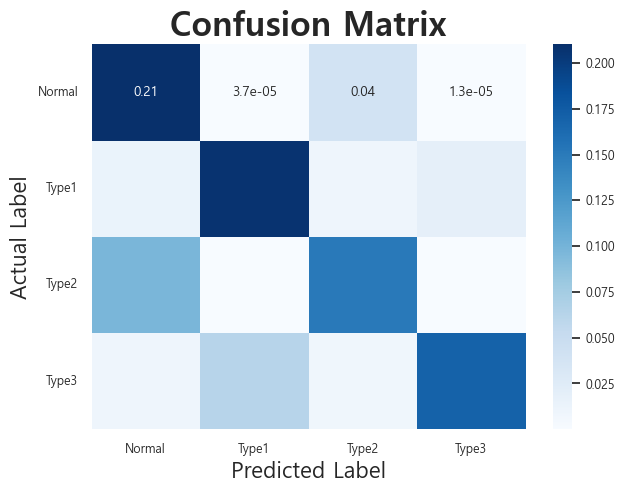

In [61]:
# 혼동행렬 그리기
draw_confusion_matrix(DNN_model, x_test, y_test, PATH)

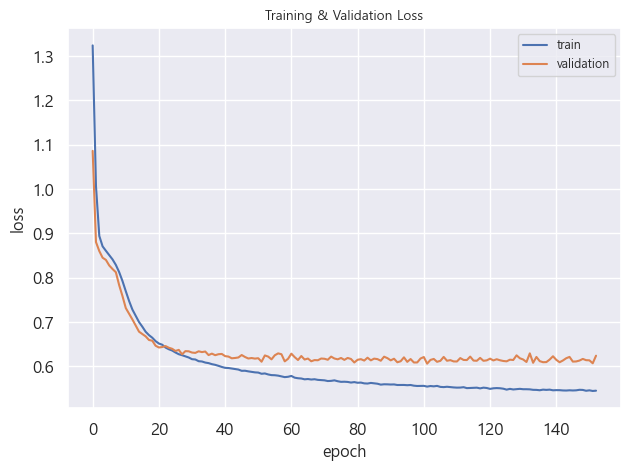

In [62]:
# 손실 그래프
plot_loss_graph(DNN_loss_values, DNN_loss_values_v)

### 합성곱신경망(CNN) 모델 평가

In [64]:
# 모델평가
PATH = 'save/CNN/'
test_model(CNN_model, PATH)

0.750775


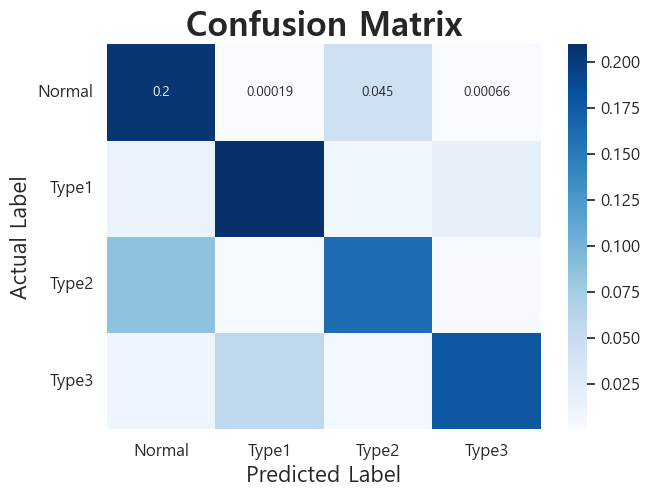

In [65]:
# 혼동행렬
draw_confusion_matrix(CNN_model,x_test, y_test, PATH)

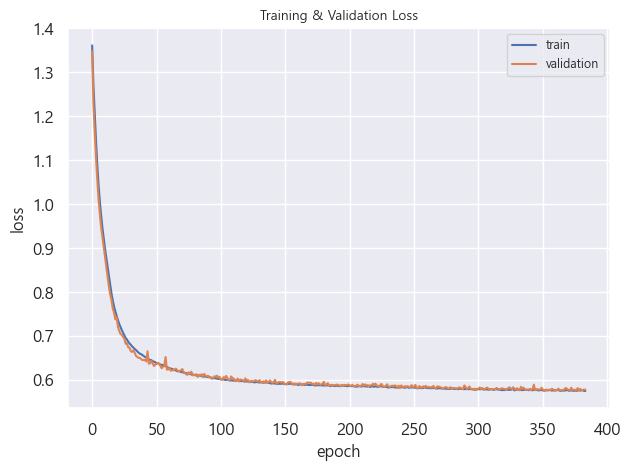

In [66]:
# 손실그래프
plot_loss_graph(CNN_loss_values, CNN_loss_values_v)

### 순환신경망(RNN) 모델 평가

In [68]:
# 모델 평가
PATH = 'save/RNN/'
test_model(RNN_model, PATH)

0.771075


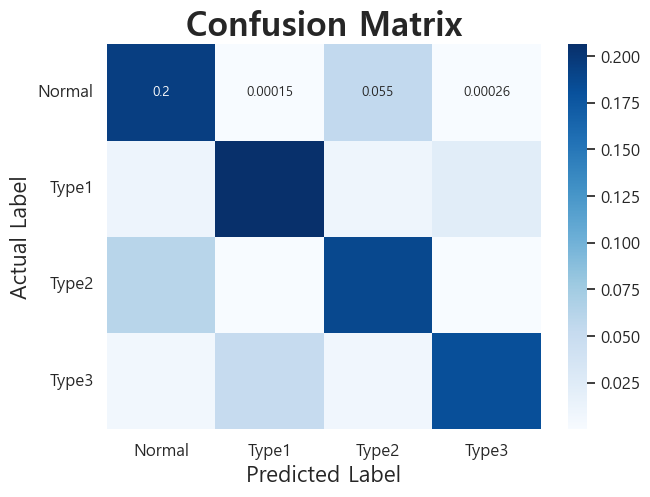

In [69]:
# 혼동 행렬
draw_confusion_matrix(RNN_model, x_test, y_test, PATH)

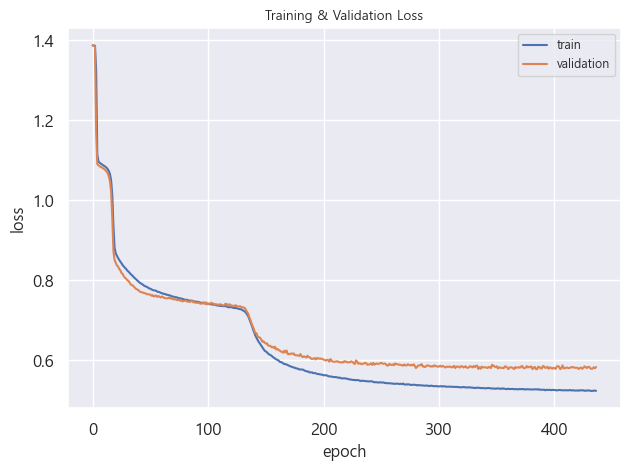

In [70]:
# 손실 그래프
plot_loss_graph(RNN_loss_values, RNN_loss_values_v)

### 결과 분석 및 최종 모델 선정
DNN : 0.7628

CNN : 0.7568

RNN : 0.7719

-----------------------------------------------------------------------------

# 부록_데이터 품질 전처리

### 완전성 품질지수

In [75]:
perc = 30
sensor1.isna().sum()/len(sensor1)*100

normal    0.0
type1     0.0
type2     0.0
type3     0.0
dtype: float64

In [76]:
perc = 30
sensor1.isna().sum()/len(sensor1)*100 > perc

normal    False
type1     False
type2     False
type3     False
dtype: bool

In [77]:
cmpt_len = sensor1.isnull().sum().sum()
print('결측치 = %d개 \n완전성 지수 : %.2f%% '%(cmpt_len,(1-cmpt_len/ len(sensor1))*100))

결측치 = 0개 
완전성 지수 : 100.00% 


In [78]:
sensor1 = sensor1.fillna(0)
cmpt_len = sensor1.isnull().sum().sum()
print('결측치 = %d개 \n완전성 지수 : %.2f%% '%(cmpt_len,(1-cmpt_len/len(sensor1))*100))

결측치 = 0개 
완전성 지수 : 100.00% 


### 유일성 품질지수

In [80]:
sensor1.groupby(['time']).size()

KeyError: 'time'

In [ ]:
uniq_len = len(sensor1.groupby(['time']).size())
print('유일성 지수 : %.2f%%'%((uniq_len/len(sensor1))*100))               

### 유효성 품질지수

In [ ]:
nonval_count = 0  # 유효하지 않은 데이터의 수를 저장할 변수 초기화

for col in sensor1.columns:  # sensor1 데이터프레임의 각 열에 대해 반복
    print(col + '의 min 값 :', sensor1[col].min(), col + '의 max 값 :', sensor1[col].max())
    col_min = sensor1[col].min()  # 현재 열의 최소값 계산
    col_max = sensor1[col].max()  # 현재 열의 최대값 계산
    tmp_chk = False  # 유효성 체크를 위한 임시 변수 초기화
    
    for dc in sensor1[col]:  # 현재 열의 각 값에 대해 반복
        tmp_chk = (col_min <= dc)  # 값이 최소값 이상인지 체크
        if not tmp_chk:  # 값이 최소값 미만이면
            print('non validation data detected', dc)  # 유효하지 않은 데이터 검출 메시지 출력
            nonval_count += 1  # 유효하지 않은 데이터 수 증가
            break  # 현재 열에 대한 반복 종료
    
val_rate_1 = (1 - nonval_count / len(sensor1))  # 유효 데이터의 비율 계산

In [ ]:
nonval_count = 0  # 유효하지 않은 데이터의 수를 저장할 변수 초기화

for col in sensor1.columns:  # sensor1 데이터프레임의 각 열에 대해 반복
    tmp_chk = False  # 유효성 체크를 위한 임시 변수 초기화
    col_c = ''  # 데이터 타입을 저장할 변수 초기화
    
    for i, dc in enumerate(sensor1[col]):  # 현재 열의 각 값에 대해 반복
        if i == 0:  # 첫 번째 값일 때
            if 'int' in str(type(dc)):  # 값의 타입이 정수(int)인지 확인
                col_c = 'int'
            elif 'float' in str(type(dc)):  # 값의 타입이 실수(float)인지 확인
                col_c = 'float'
        
        tmp_chk = (col_c in str(type(dc)))  # 현재 값의 타입이 col_c와 일치하는지 확인
        if not tmp_chk:  # 값의 타입이 일치하지 않으면
            nonval_count += 1  # 유효하지 않은 데이터 수 증가
            break  # 현재 열에 대한 반복 종료

val_rate_2 = (1 - nonval_count / len(sensor1))  # 유효 데이터의 비율 계산
print((val_rate_1 + val_rate_2) / 2 * 100, "%")  # 두 비율의 평균을 계산하여 백분율로 출력

### 일관성 품질지수

In [ ]:
# sensor1 데이터프레임의 각 열의 데이터 타입을 출력
print(sensor1.dtypes)

nonval_count = 0  # 유효하지 않은 데이터의 수를 저장할 변수 초기화

for col in sensor1.columns:  # sensor1 데이터프레임의 각 열에 대해 반복
    tmp_chk = False  # 유효성 체크를 위한 임시 변수 초기화
    col_c = ''  # 데이터 타입을 저장할 변수 초기화
    
    for col in sensor1.columns:  # sensor1 데이터프레임의 각 열에 대해 반복
        tmp_chk = False  # 유효성 체크를 위한 임시 변수 초기화
        col_c = ''  # 데이터 타입을 저장할 변수 초기화
        
        for i, dc in enumerate(sensor1[col]):  # 현재 열의 각 값에 대해 반복
            if i == 0:  # 첫 번째 값일 때
                if 'int' in str(type(dc)):  # 값의 타입이 정수(int)인지 확인
                    col_c = 'int'
                elif 'float' in str(type(dc)):  # 값의 타입이 실수(float)인지 확인
                    col_c = 'float'
                tmp_chk = (col_c in str(type(dc)))  # 현재 값의 타입이 col_c와 일치하는지 확인
            
            if not tmp_chk:  # 값의 타입이 일치하지 않으면
                nonval_count += 1  # 유효하지 않은 데이터 수 증가

val_rate_2 = (1 - nonval_count / len(sensor1))  # 유효 데이터의 비율 계산
print((val_rate_1 + val_rate_2) / 2 * 100, "%")  # 두 비율의 평균을 계산하여 백분율로 출력